下例为乳房癌的概率，通过多个角度评估模型。

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
# 1)读取数据
cancer = load_breast_cancer()

# 2)数据集划分
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

# 3)特征工程
transformer = StandardScaler()
x_train = transformer.fit_transform(x_train)
x_test = transformer.fit_transform(x_test)

# 4)KNN算法
estimator = LogisticRegression()
estimator.fit(x_train, y_train)

# 5)模型评估
score = estimator.score(x_test, y_test)
print(u"准确率： \n", score)
y_predict = estimator.predict(x_test)

准确率： 
 0.958041958041958


/Users/cleland/.pyenv/versions/3.7.1/envs/base/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 准确度
accuracy = 正确的数据量 / 样本量



In [3]:
def score(y_predict, y_ture):
    return sum(y_predict == y_test) / y_ture.size

print(u"准确率: ", score(y_predict, y_test))
print(u"sklearn 准确率: ", estimator.score(x_test, y_test))

准确率:  0.958041958041958
sklearn 准确率:  0.958041958041958


## 混淆矩阵

- 0 - Negative(阴性，消极)
- 1 - Postive(阳性，积极)

||预测值_0|预测值_1|
|:--|:--|:--|
|**真实值_0**|TN|FP|
|**真实值_1**|FN|TP|


In [4]:
def TN(y_predict, y_true):
    return sum((y_predict == 0) & (y_true == 0))

def FN(y_predict, y_true):
    return sum((y_predict == 0) & (y_true == 1))

def FP(y_predict, y_true):
    return sum((y_predict == 1) & (y_true == 0))

def TP(y_predict, y_true):
    return sum((y_predict == 1) & (y_true == 1))

print("TN: ", TN(y_predict, y_test))
print("FN: ", FN(y_predict, y_test))
print("FP: ", FP(y_predict, y_test))
print("TP: ", TP(y_predict, y_test))


from sklearn.metrics import confusion_matrix
print(u'sklearn 混淆矩阵: \n', confusion_matrix(y_test, y_predict))

TN:  53
FN:  4
FP:  2
TP:  84
sklearn 混淆矩阵: 
 [[53  2]
 [ 4 84]]


## 精确度
$$
\text { precision }=\frac{T P}{T P+F P}
$$


In [5]:
def precision(y_predict, y_true):
    result = 0.0
    try:
        result = TP(y_predict, y_true) / (TP(y_predict, y_true) +  FP(y_predict, y_true))
    except ZeroDivisionError:
        result = 0.0
    return result

print(u"精确率: \n", precision(y_predict, y_test))

from sklearn.metrics import precision_score
print(u'sklearn 精确度: \n', precision_score(y_test, y_predict))

精确率: 
 0.9767441860465116
sklearn 精确度: 
 0.9767441860465116


## 召回率

$$
\text { recall }=\frac{T P}{T P+F N}
$$

In [6]:
def recall(y_predict, y_true):
    result = 0.0
    try:
        result = TP(y_predict, y_true) / (TP(y_predict, y_true) +  FN(y_predict, y_true))
    except ZeroDivisionError:
        result = 0.0
    return result

print(u"召回率: \n", recall(y_predict, y_test))

from sklearn.metrics import recall_score
print(u'sklearn 召回率: \n', recall_score(y_test, y_predict))

召回率: 
 0.9545454545454546
sklearn 召回率: 
 0.9545454545454546


## F1 Score

$$
F 1=\frac{2 \cdot \text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}
$$

In [7]:
def f1(y_predict, y_true):
    precision_score = precision(y_predict, y_true)
    recall_score = recall(y_predict, y_true)
    result = 0.0
    try:
        result = (2 * precision_score * recall_score) / (precision_score + recall_score)
    except ZeroDivisionError:
        result = 0.0
    return result

print(u"F1 Score: \n", f1(y_predict, y_test))

from sklearn.metrics import f1_score
print(u'sklearn F1 Score: \n', f1_score(y_test, y_predict))


F1 Score: 
 0.9655172413793104
sklearn F1 Score: 
 0.9655172413793104


## 平衡精确率与召回率

In [8]:
decision_scores = estimator.decision_function(x_test)

### 自己绘制准确率与召回率的关系

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
steps = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for step in steps:
    y_predict = np.array(decision_scores >= step, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))


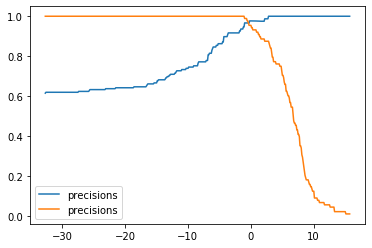

In [10]:
plt.plot(steps, precisions, label='precisions')
plt.plot(steps, recalls, label='precisions')
plt.legend(loc='lower left')
plt.show()

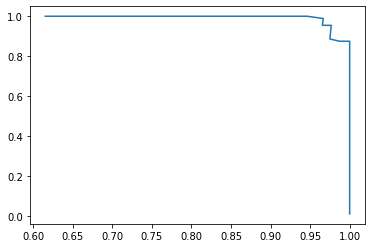

In [11]:
plt.plot(precisions, recalls)
plt.show()

## sklearn

In [12]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, steps = precision_recall_curve(y_test, decision_scores)

print('precisions', precisions.shape)
print('recalls', recalls.shape)
print('steps', steps.shape)

precisions (93,)
recalls (93,)
steps (92,)


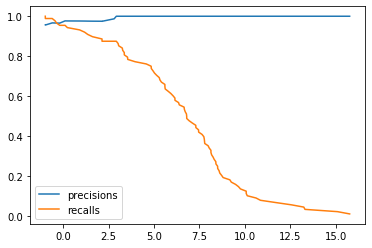

In [13]:
plt.plot(steps, precisions[:-1], label='precisions')
plt.plot(steps, recalls[:-1], label='recalls')
plt.legend(loc='lower left')
plt.show()

## ROC

$$
T P R=\frac{T P}{T P+F N}
$$

$$
F P R=\frac{F P}{T N+F P}
$$

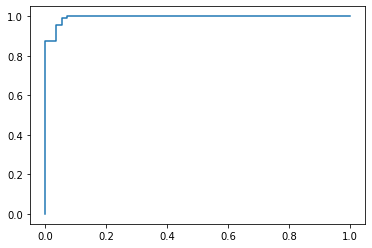

In [18]:
from sklearn.metrics import roc_curve

fprs, tprs, steps = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.show()